# Caso de Uso: Monitoreo de Reputación de la Campaña de Kamala Harris contra Donald Trump

## 1. Objetivo
Utilizar la **extracción de entidades** para analizar y monitorear la reputación de la campaña de **Kamala Harris** en su disputa política contra **Donald Trump** en los medios de comunicación. El objetivo es identificar menciones relevantes de ambos candidatos, sus políticas, y los sentimientos asociados, para ayudar a la campaña de Harris en la toma de decisiones estratégicas.

## 2. Datos de Entrada
- **Fuentes**: Noticias y artículos de medios de comunicación, redes sociales (Twitter, Facebook), y blogs políticos relacionados con la campaña de Kamala Harris y Donald Trump.
- **Formato**: Texto no estructurado (artículos, tweets, comentarios en blogs).
  
### **Ejemplos de datos**:
1. Un **artículo de noticias**: "Kamala Harris critica las políticas de Trump sobre inmigración en su discurso más reciente."
2. Un **tweet**: "Trump acusa a Kamala Harris de mentir sobre su posición en el tema de impuestos."

## 3. Tecnología
- **Modelo NER (NuNER v2.0)** para identificar entidades como:
    - **Personas**: Kamala Harris, Donald Trump
    - **Temas**: Inmigración, impuestos, salud, economía, educación.
    - **Ubicaciones**: Estados clave en las elecciones (Florida, Texas, Michigan).
    - **Organizaciones**: Partidos políticos, agencias gubernamentales, ONGs involucradas en la campaña.
- Herramientas de procesamiento de lenguaje natural (NLP) como **Transformers** o **spaCy**.
- Análisis de sentimiento para determinar si las menciones son **positivas**, **negativas**, o **neutras**.

## 4. Flujo de Trabajo
1. **Recopilación de datos**: Utilizar la **API de Google News** para recopilar artículos que mencionen a Kamala Harris, Donald Trump, y temas relacionados.
2. **Procesamiento del texto**: Limpiar y preprocesar los artículos y tweets recopilados (eliminación de caracteres especiales, manejo de idiomas).
3. **Aplicación del modelo NER**: Implementar el modelo para extraer entidades clave:
   - **Personas**: Kamala Harris, Donald Trump.
   - **Temas**: Economía, inmigración, política exterior.
   - **Ubicaciones**: Estados Unidos, estados clave en las elecciones.
4. **Análisis de sentimiento**: Aplicar un modelo para clasificar las menciones de los candidatos y sus posiciones políticas en **positivas**, **negativas** o **neutras**.
5. **Visualización**: Mostrar tendencias de menciones y opiniones sobre los candidatos en un **dashboard interactivo** con gráficos de línea o de barras.

## 5. Resultado
- **Informes de tendencias**: Identificación de aumentos en menciones de Kamala Harris o Donald Trump en relación con temas clave como inmigración, economía, y política exterior.
- **Análisis competitivo**: Comparar la cantidad y el sentimiento de las menciones entre ambos candidatos en los medios y redes sociales.



#### Fase recopilatoria de datos

In [ ]:
import requests

API_KEY = 'b3d9417663084e25bde0513477aca1b8'
url = 'https://newsapi.org/v2/everything'

query_params = {
    'q': 'Kamala Harris OR Donald Trump',
    'from': '2024-09-25',
    'sortBy': 'relevance',
    'language': 'en',
    'apiKey': API_KEY
}

response = requests.get(url, params=query_params)
data = response.json()

if response.status_code == 200:
    if 'articles' in data:
        for article in data['articles']:
            print(article['title'])
    else:
        print("No articles found in the response.")
else:
    print(f"Error: {response.status_code}, {data.get('message', 'No message')}")



Get Your VP Debate Bingo Card Right Here
We Staged a Debate to Test the Bluetooth Earrings Kamala Harris Didn’t Wear
Dems Launch Taylor Swift Snapchat Filter to Target Young Voters for Kamala Harris
FCC chair rejects Trump’s call to revoke CBS license over Harris interview edit
Kamala Harris goes on offensive with 'tough on border' message
Donald Trump’s iPhone Wallpaper Is Just a Photo of Himself
JD Vance avoids January 6th questions by pivoting to Facebook ‘censorship’
Trump Says He’ll Prosecute Google If He Retakes Power
Muted mic, abortion rights and civility - top takeaways from VP debate
Why Trump Is ‘Personally’ Thanking His Enemies on Twitter
Trump Supporters’ Fake Stories About Harris and Walz Flood the ‘For You’ Page on X
MAGA Faithful Say McDonald’s E. Coli Outbreak Is a Conspiracy to Hurt Trump
A Stalled Waymo Blocked Kamala Harris’s Motorcade in San Francisco
Newly Released Emails Show How Trump’s ‘Eating the Pets’ Conspiracy Theory Led to a Deluge of Threats
All the singl

In [ ]:
data

{'status': 'ok',
 'totalResults': 20414,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Makena Kelly',
   'title': 'Get Your VP Debate Bingo Card Right Here',
   'description': "Vice presidential nominees J.D. Vance and Tim Walz are debating tonight. Let's follow along together!",
   'url': 'https://www.wired.com/story/bingo-how-to-watch-vp-walz-vance-debate/',
   'urlToImage': 'https://media.wired.com/photos/66f70c288af4eb900c2450f5/191:100/w_1280,c_limit/vp-debate-498125917.jpg',
   'publishedAt': '2024-10-01T10:00:00Z',
   'content': 'On Tuesday night, vice presidential nominees J.D. Vance and Tim Walz will debate one another for the first and only time ahead of the November presidential election.\r\nBefore becoming an Ohio senator,… [+1908 chars]'},
  {'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Verity Burns',
   'title': 'We Staged a Debate to Test the Bluetooth Earrings Kamala Harris Didn’t Wear',
   'description': 'Could Vice President Har

In [ ]:
import pandas as pd
articles = data['articles']

df = pd.DataFrame([{
    'source_name': article['source']['name'],
    'author': article['author'],
    'title': article['title'],
    'description': article['description'],
    'url': article['url'],
    'url_to_image': article['urlToImage'],
    'published_at': article['publishedAt'],
    'content': article['content']
} for article in articles])

df

,source_name,author,title,description,url,url_to_image,published_at,content
0,Wired,Makena Kelly,Get Your VP Debate Bingo Card Right Here,Vice presidential nominees J.D. Vance and Tim ...,https://www.wired.com/story/bingo-how-to-watch...,https://media.wired.com/photos/66f70c288af4eb9...,2024-10-01T10:00:00Z,"On Tuesday night, vice presidential nominees J..."
1,Wired,Verity Burns,We Staged a Debate to Test the Bluetooth Earri...,Could Vice President Harris have used these Bl...,https://www.wired.com/review/review-nova-h1-au...,https://media.wired.com/photos/66fc4b46965245b...,2024-10-01T20:32:06Z,"Just a few weeks ago, certain people in a part..."
2,Gizmodo.com,Matt Novak,Dems Launch Taylor Swift Snapchat Filter to Ta...,The campaign pushes users to IWillVote.com to ...,https://gizmodo.com/dems-launch-taylor-swift-s...,https://gizmodo.com/app/uploads/2024/10/taylor...,2024-10-18T12:55:08Z,The Democratic National Committee announced a ...
3,The Verge,Lauren Feiner,FCC chair rejects Trump’s call to revoke CBS l...,The Federal Communications Commission rejected...,https://www.theverge.com/2024/10/10/24267054/f...,https://cdn.vox-cdn.com/thumbor/R0TqwDHH6tJjdQ...,2024-10-10T17:58:08Z,FCC chair rejects Trumps call to revoke CBS li...
4,BBC News,None,Kamala Harris goes on offensive with 'tough on...,"In her first visit to the border since 2021, t...",https://www.bbc.com/news/articles/ce9jx3zp13mo,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-09-28T02:50:27Z,US Vice-President Kamala Harris has made a rar...
...,...,...,...,...,...,...,...,...
95,Business Insider,Ayelet Sheffey,Kamala Harris is embracing the degree-free wav...,Vice President Kamala Harris proposed getting ...,https://www.businessinsider.com/federal-jobs-n...,https://i.insider.com/66f475cdde59ade1a3b4a4ce...,2024-09-26T17:24:14Z,Vice President Kamala Harris proposed getting ...
96,Time,Joey Cappelletti / AP,"At Detroit Rally for Kamala Harris, Eminem End...","Voter turnout in Detroit, a longtime Democrati...",https://time.com/7096316/eminem-barack-obama-k...,https://api.time.com/wp-content/uploads/2024/1...,2024-10-23T04:00:00Z,DETROIT Detroit rapper Eminem stepped into the...
97,Time,Brian Bennett,Harris: Trump Is a ‘Fascist’ Who Will Use Mili...,Harris said Trump would use the military “to c...,https://time.com/7096898/harris-trump-facist-s...,https://api.time.com/wp-content/uploads/2024/1...,2024-10-23T21:31:03Z,Vice President Kamala Harris delivered a rare ...
98,Time,Charlotte Alter,Harris Intensifies Pitch to Disaffected Republ...,The Vice President thinks there are enough con...,https://time.com/7093796/harris-republican-out...,https://api.time.com/wp-content/uploads/2024/1...,2024-10-17T16:21:30Z,"With less than three weeks until Election Day,..."


In [ ]:
df.to_csv('news.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('news.csv')

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
from collections import Counter

# Configuración del modelo y pipeline
model_name = "numind/NuNER-v2.0"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, device=0, grouped_entities=True)

# Función para extraer entidades con NuNER
def extract_entities_nuner(text):
    if not text:
        return []
    ner_results = ner_pipeline(text)
    return [(entity['word'], entity['entity_group']) for entity in ner_results]

# Preparación del DataFrame
df['title'] = df['title'].fillna('')
df['description'] = df['description'].fillna('')
df['content'] = df['content'].fillna('')

# Extracción de entidades
df['entities_title'] = df['title'].apply(extract_entities_nuner)
df['entities_description'] = df['description'].apply(extract_entities_nuner)
df['entities_content'] = df['content'].apply(extract_entities_nuner)

# Extracción y conteo de entidades
def extract_all_entities(df_column):
    return [entity for entities in df_column for entity, label in entities]

all_entities = extract_all_entities(df['entities_title']) + \
               extract_all_entities(df['entities_description']) + \
               extract_all_entities(df['entities_content'])

entity_counts = Counter(all_entities)
print("Top 10 entidades más frecuentes:", entity_counts.most_common(10))

# Normalización de entidades para la búsqueda
def normalize_entity(entity):
    return entity.replace(" ", "").lower()

# Filtrar menciones específicas
kamala_mentions = df['entities_content'].apply(
    lambda entities: any(normalize_entity(entity) == 'kamalaharris' for entity, label in entities)
)
trump_mentions = df['entities_content'].apply(
    lambda entities: any('trump' in normalize_entity(entity) for entity, label in entities)
)

kamala_articles = df[kamala_mentions]
trump_articles = df[trump_mentions]

print("Artículos que mencionan a Kamala Harris:")
print(kamala_articles[['title', 'entities_content']])

print("Artículos que mencionan a Donald Trump:")
print(trump_articles[['title', 'entities_content']])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at numind/NuNER-v2.0 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted t

Top 10 entidades más frecuentes: [(' Trump', 80), (']', 78), ('ala', 60), (' chars', 32), ('�', 25), (' Donald Trump', 24), ('.', 23), ('ul><', 21), ('amala Harris', 18), (' and', 18)]
Artículos que mencionan a Kamala Harris:
                                                title  \
4   Kamala Harris goes on offensive with 'tough on...   
42  Kamala Harris wants to expand student-loan for...   
77  Kamala Harris' pitch to families struggling to...   
90  Harris vs. Trump on Student Loans: Experts Wei...   
91  Your Student Loans Under Harris vs. Trump. Her...   

                                     entities_content  
4   [(US Vice-President, LABEL_0), ( Kamala Harris...  
42  [(Vice President Kam, LABEL_0), (ala, LABEL_1)...  
77  [(Vice President, LABEL_0), ( Kamala, LABEL_1)...  
90  [(The future of student, LABEL_0), ( loan, LAB...  
91  [(The future of student, LABEL_0), ( loan, LAB...  
Artículos que mencionan a Donald Trump:
                                                title  

1. Análisis de Sentimientos
Objetivo: Determinar el tono (positivo, negativo, neutral) de los artículos en relación con las entidades de interés, como Kamala Harris y Donald Trump.

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

df['sentiment'] = df['content'].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])  # Limitar a 512 tokens


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
# Función para dividir el texto en fragmentos manejables
def split_text(text, max_length=500):
    sentences = text.split('.')
    chunks = []
    current_chunk = ''
    for sentence in sentences:
        if len(current_chunk) + len(sentence) + 1 <= max_length:
            current_chunk += sentence + '.'
        else:
            chunks.append(current_chunk.strip())
            current_chunk = sentence + '.'
    if current_chunk:
        chunks.append(current_chunk.strip())
    return chunks

# Función para obtener el sentimiento promedio de un texto
def get_sentiment(text):
    if not text:
        return np.nan
    chunks = split_text(text)
    sentiments = []
    for chunk in chunks:
        results = sentiment_pipeline(chunk)
        for res in results:
            label = res['label']
            # Extraer el número de estrellas de la etiqueta
            score = int(label.split()[0])
            sentiments.append(score)
    if sentiments:
        return np.mean(sentiments)
    else:
        return np.nan



In [ ]:
import numpy as np
df['sentiment'] = df['content'].apply(get_sentiment)

In [ ]:
df['sentiment']

,sentiment
0,4.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
95,1.0
96,4.0
97,1.0
98,1.0


In [ ]:
# Función para normalizar las entidades
def normalize_entity(entity_word):
    return entity_word.lower().replace(' ', '')

# Filtrar artículos que mencionan a Kamala Harris
kamala_articles = df[df['entities_content'].apply(
    lambda entities: any('kamala' in normalize_entity(entity[0]) for entity in entities) and
                     any('harris' in normalize_entity(entity[0]) for entity in entities)
)]

# Filtrar artículos que mencionan a Donald Trump
trump_articles = df[df['entities_content'].apply(
    lambda entities: any('trump' in normalize_entity(entity[0]) for entity in entities)
)]



In [ ]:
# Sentimiento promedio para Kamala Harris
kamala_sentiment = kamala_articles['sentiment'].mean()
print(f"Sentimiento promedio en artículos que mencionan a Kamala Harris: {kamala_sentiment:.2f}")

# Sentimiento promedio para Donald Trump
trump_sentiment = trump_articles['sentiment'].mean()
print(f"Sentimiento promedio en artículos que mencionan a Donald Trump: {trump_sentiment:.2f}")


Sentimiento promedio en artículos que mencionan a Kamala Harris: 2.36
Sentimiento promedio en artículos que mencionan a Donald Trump: 2.14


In [ ]:
from scipy.stats import ttest_ind

# Eliminar valores NaN
kamala_sentiments = kamala_articles['sentiment'].dropna()
trump_sentiments = trump_articles['sentiment'].dropna()

# Prueba t
t_stat, p_value = ttest_ind(kamala_sentiments, trump_sentiments, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


T-statistic: 0.4132, P-value: 0.6858


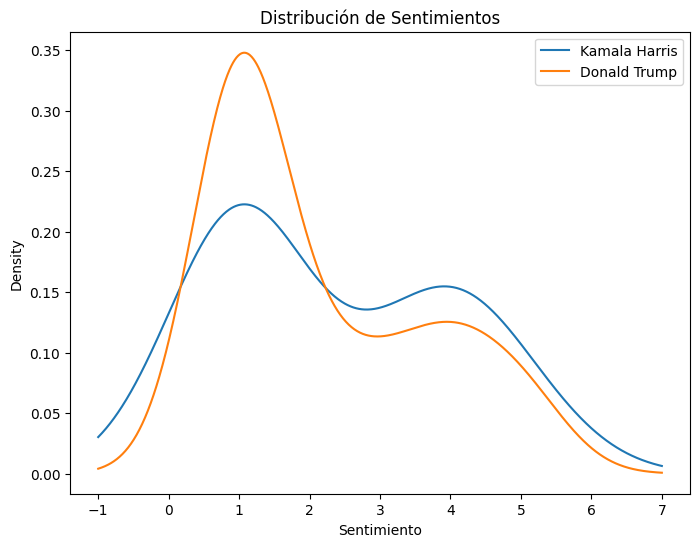

<Figure size 800x600 with 0 Axes>

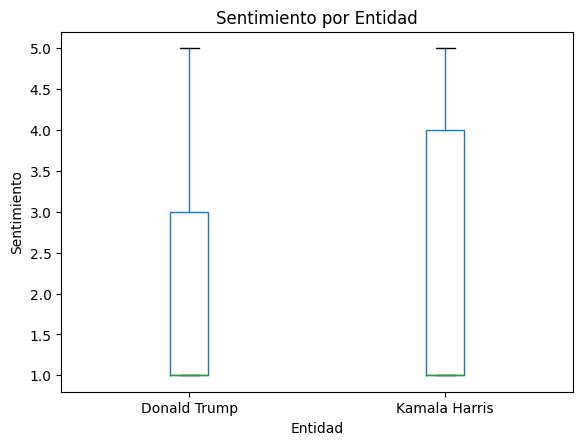

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de densidad
plt.figure(figsize=(8, 6))
kamala_articles['sentiment'].plot(kind='density', label='Kamala Harris')
trump_articles['sentiment'].plot(kind='density', label='Donald Trump')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.legend()
plt.show()

# Boxplot
sentiment_data = pd.DataFrame({
    'Sentimiento': pd.concat([kamala_articles['sentiment'], trump_articles['sentiment']]),
    'Entidad': ['Kamala Harris'] * len(kamala_articles) + ['Donald Trump'] * len(trump_articles)
})

plt.figure(figsize=(8, 6))
sentiment_data.boxplot(by='Entidad', column=['Sentimiento'], grid=False)
plt.title('Sentimiento por Entidad')
plt.suptitle('')
plt.xlabel('Entidad')
plt.ylabel('Sentimiento')
plt.show()



In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.8 MB/s eta 0:00:00


In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.lda_model.prepare
import matplotlib.pyplot as plt

# Descargar recursos de NLTK si no lo has hecho antes
nltk.download('stopwords')

# Definir el stemmer y stopwords
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

# Función para preprocesar el texto
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    text = ' '.join(tokens)
    return text

# Aplicar preprocesamiento
kamala_articles['processed_content'] = kamala_articles['content'].apply(preprocess_text)
trump_articles['processed_content'] = trump_articles['content'].apply(preprocess_text)

# Crear vectorizadores separados
vectorizer_kamala = CountVectorizer(stop_words='english', max_features=1000)
vectorizer_trump = CountVectorizer(stop_words='english', max_features=1000)

# Vectorizar el texto
X_kamala = vectorizer_kamala.fit_transform(kamala_articles['processed_content'])
X_trump = vectorizer_trump.fit_transform(trump_articles['processed_content'])

# Aplicar LDA a los artículos sobre Kamala Harris
lda_kamala = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online', random_state=42)
lda_kamala.fit(X_kamala)

# Aplicar LDA a los artículos sobre Donald Trump
lda_trump = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online', random_state=42)
lda_trump.fit(X_trump)

# Función para mostrar los temas
def display_topics(model, feature_names, no_top_words, entity_name):
    for idx, topic in enumerate(model.components_):
        print(f"Top palabras para el tema #{idx} en artículos sobre {entity_name}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-55-de91d3eb2a02>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kamala_articles['processed_content'] = kamala_articles['content'].apply(preprocess_text)
<ipython-input-55-de91d3eb2a02>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [ ]:
# Mostrar temas para Kamala Harris
no_top_words = 10
feature_names_kamala = vectorizer_kamala.get_feature_names_out()

print("Temas en artículos sobre Kamala Harris:\n")
display_topics(lda_kamala, feature_names_kamala, no_top_words, 'Kamala Harris')

# Mostrar temas para Donald Trump
feature_names_trump = vectorizer_trump.get_feature_names_out()

print("Temas en artículos sobre Donald Trump:\n")
display_topics(lda_trump, feature_names_trump, no_top_words, 'Donald Trump')






Temas en artículos sobre Kamala Harris:

Top palabras para el tema #0 en artículos sobre Kamala Harris:
presid, novemb, kamala, trump, harri, donald, sen, vice, forgiv, char


Top palabras para el tema #1 en artículos sobre Kamala Harris:
harri, presid, border, vice, kamala, donald, char, blunt, trum, campaign


Top palabras para el tema #2 en artículos sobre Kamala Harris:
presid, kamala, harri, char, vice, biden, joe, detroit, program, donald


Top palabras para el tema #3 en artículos sobre Kamala Harris:
decid, corner, ago, trump, better, internet, presidenti, kamala, donald, crack


Top palabras para el tema #4 en artículos sobre Kamala Harris:
li, harri, kamala, presid, vice, imag, propos, ul, getti, char


Temas en artículos sobre Donald Trump:

Top palabras para el tema #0 en artículos sobre Donald Trump:
trump, presid, donald, char, harri, kamala, li, vice, ul, imag


Top palabras para el tema #1 en artículos sobre Donald Trump:
trump, char, li, imag, getti, donald, ul, elon, 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# O, si estás fuera de un notebook, para abrir en un navegador
# pyLDAvis.show(lda_display_kamala)

# Visualización con pyLDAvis para Donald Trump
lda_display_trump = pyLDAvis.lda_model.prepare(lda_trump, X_trump, vectorizer_trump, sort_topics=False)
pyLDAvis.display(lda_display_trump)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Preparar los datos para visualización
lda_display_kamala = pyLDAvis.lda_model.prepare(lda_kamala, X_kamala, vectorizer_kamala, sort_topics=False)

# Mostrar la visualización en un notebook
pyLDAvis.display(lda_display_kamala)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
